### Author: Grace Li
### Created On: 6/26/2022

This python code explores the basic information of the school networks

In [1]:
# import required packages

import numpy as np
import pandas as pd
from scipy import io
import scipy
import sys
import random
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
import time as time
import igraph as igraph
import os.path

In [2]:
# Import our own DW module
import sys
sys.path.append('..') #look one directory above
sys.path.append("../..")
import DynamicBC

In [3]:
#Network names
networks = ['Caltech', 'Reed', 'Swarthmore',
            'Oberlin', 'Pepperdine', 'Rice',
            'UCSB', 'UCLA']


Caltech
Adjacency matrix
Size: (769, 769)
Number of edges: 16656.0
Symmetry residual check: 0.0
Number of components:  4
Small Components are:
[ 12  73 105]
[ 34 146]
[168 436]
Small Component Nodes are:
[12, 73, 105, 34, 146, 168, 436]
GCC
Number of vertices: 762
Number of edges: 16651


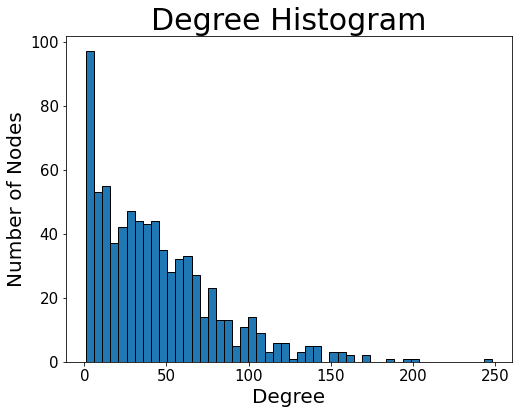


Reed
Adjacency matrix
Size: (962, 962)
Number of edges: 18812.0
Symmetry residual check: 0.0
Number of components:  1
GCC
Number of vertices: 962
Number of edges: 18812


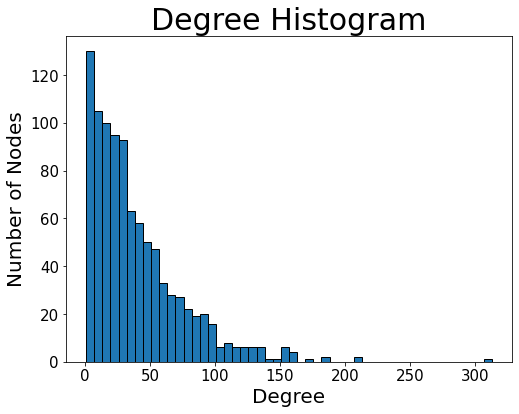


Swarthmore
Adjacency matrix
Size: (1659, 1659)
Number of edges: 61050.0
Symmetry residual check: 0.0
Number of components:  2
Small Components are:
[585 635]
Small Component Nodes are:
[585, 635]
GCC
Number of vertices: 1657
Number of edges: 61049


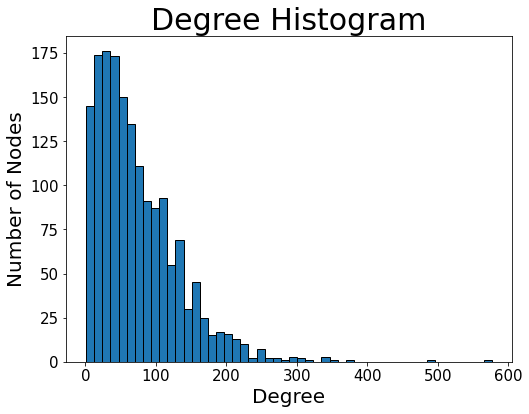


Oberlin
Adjacency matrix
Size: (2920, 2920)
Number of edges: 89912.0
Symmetry residual check: 0.0
Number of components:  1
GCC
Number of vertices: 2920
Number of edges: 89912


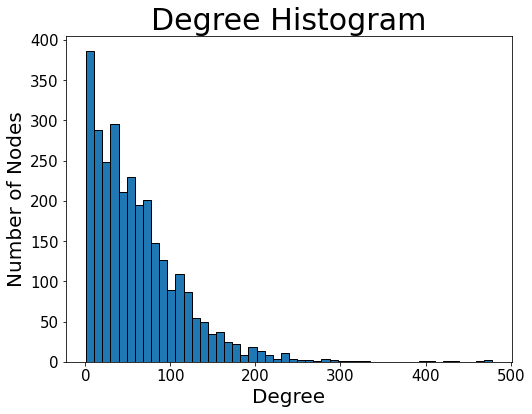


Pepperdine
Adjacency matrix
Size: (3445, 3445)
Number of edges: 152007.0
Symmetry residual check: 0.0
Number of components:  3
Small Components are:
[1345 2742 3270]
[1493 2565]
Small Component Nodes are:
[1345, 2742, 3270, 1493, 2565]
GCC
Number of vertices: 3440
Number of edges: 152003


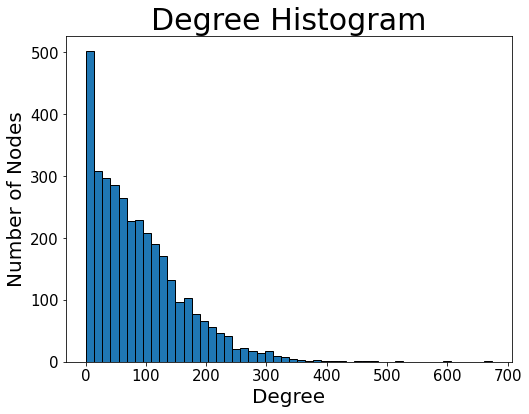


Rice
Adjacency matrix
Size: (4087, 4087)
Number of edges: 184828.0
Symmetry residual check: 0.0
Number of components:  3
Small Components are:
[ 549 1327]
[2239 3438]
Small Component Nodes are:
[549, 1327, 2239, 3438]
GCC
Number of vertices: 4083
Number of edges: 184826


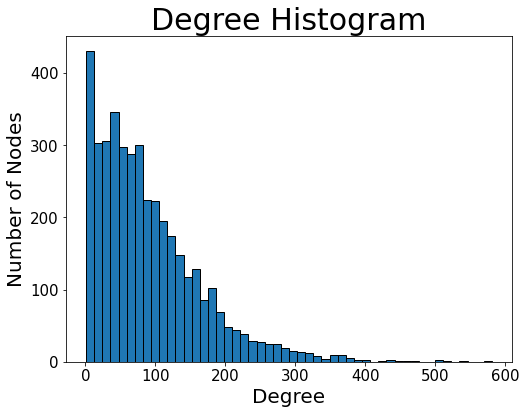


UCSB
Adjacency matrix
Size: (14935, 14935)
Number of edges: 482224.0
Symmetry residual check: 0.0
Number of components:  10


IOStream.flush timed out


Small Components are:
[ 153 3038]
[  251 11811]
[  862 13115]
[1083 6643]
[1319 9006]
[3157 5649]
[ 4119 11724]
[11067 12742]
[11751 14914]
Small Component Nodes are:
[153, 3038, 251, 11811, 862, 13115, 1083, 6643, 1319, 9006, 3157, 5649, 4119, 11724, 11067, 12742, 11751, 14914]
GCC
Number of vertices: 14917
Number of edges: 482215


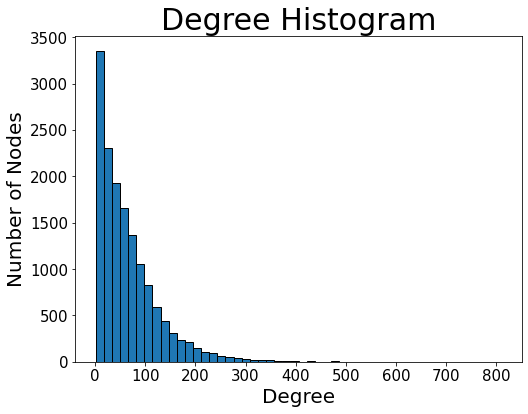


UCLA
Adjacency matrix
Size: (20467, 20467)
Number of edges: 747613.0
Symmetry residual check: 0.0
Number of components:  7
Small Components are:
[ 507 2107]
[ 730 9514]
[ 4007 14803]
[ 6324 17238]
[ 6795  9329 19348 20290]
[6833 9735]
Small Component Nodes are:
[507, 2107, 730, 9514, 4007, 14803, 6324, 17238, 6795, 9329, 19348, 20290, 6833, 9735]
GCC
Number of vertices: 20453
Number of edges: 747604


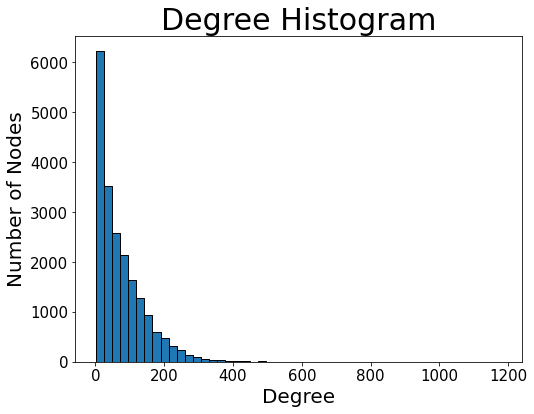

In [4]:
#For each network, get the basic information
for network in networks:
    
    print()
    print(network)
    
    ## Read the adjacency matrix and get number of nodes/edges
    matfile = f"network_data/{network}.mat"
    data = io.loadmat(matfile)
    # print('local_info of size:', data['local_info'].shape)

    print('Adjacency matrix')
    # print(type(data['A']))
    print('Size:', data['A'].shape)
    print('Number of edges:', data['A'].count_nonzero()/2)

    #Check symmetry
    check = scipy.sparse.linalg.norm(data['A'] - data['A'].T)
    print('Symmetry residual check:', check)

    #Convert adjacency matrix to igraph graph
    A = data['A'].toarray()
    G = igraph.Graph.Adjacency(A, mode = "undirected")
    del A #delete the dense matrix to free up space
    
    
    ## Get the component information

    #Get the number of components of the graph
    component_membership = G.clusters(mode='strong').membership
    n_components = max(component_membership)+1
    print("Number of components: ", n_components)

    #Get the components of the graph if there is more than 1
    if n_components > 1:
        isolated_nodes = [] #list to store isolated nodes for removal
        small_component_nodes = [] #list to store small component nodes to keep track of how often they're drawn
        GCC_size = G.clusters(mode='strong').sizes()
        GCC_size = max(GCC_size) #calculate the size of the giant connected component

        print("Small Components are:")
        components = []
        for i in range(n_components):
            component = np.nonzero(np.array(component_membership)==i)[0]
            components.append(component.tolist())

            if len(component) == 1:
                isolated_nodes.append(component[0])
                print(component)
            elif len(component) < GCC_size:
                small_component_nodes = small_component_nodes + component.tolist()
                print(component)

        print("Small Component Nodes are:")
        print(small_component_nodes)
        
    ## Get the GCC

    component_membership = G.clusters(mode='strong').membership
    component = np.nonzero(np.array(component_membership)==0)[0]
    print('GCC')
    print('Number of vertices:', len(component))

    GCC = G.induced_subgraph(component)
    # igraph.plot(GCC, **visual_style)
    print('Number of edges:', GCC.ecount())

    
    ## Plot the degree distribution

    degree_sequence = GCC.degree()
    degree_sequence = np.array(degree_sequence) #Convert it to a numpy array so we can get the counts
    degrees, counts = np.unique(degree_sequence, return_counts=True)
    fraction = counts / sum(counts) #normalize the counts to get the degree distribution (the fraction of nodes of each degree)

    # #Regular scatter plot
    # fig, ax = plt.subplots(figsize = (8, 6)) #Create 6 in x 8 in figure
    # ax.scatter(degrees, counts) #Plot the degree distribution as a scatter plot
    # ax.set_title('Degree Plot', fontsize = 30)
    # ax.set_ylabel(r"Number of Nodes", fontsize=20) #You can add LaTeX to text using $$ and the r in front of the string
    # ax.set_xlabel(r"Degree", fontsize=20)
    # ax.tick_params(axis = 'both', labelsize = 15)
    # plt.savefig("combined_plots/Caltech_degrees.png")

    #Plot an unnormalized histogram of counts of each degree
    fig, ax = plt.subplots(figsize = (8, 6)) #Create 6 in x 8 in figure
    # bins = list(range(0, 260, 10))
    ax.hist(degree_sequence, bins = 50,  edgecolor = "black") #Plot the unnormalized histogram with just counts, you can try varying the number of bins to see what works for your network
    ax.set_title('Degree Histogram', fontsize = 30)
    ax.set_ylabel(r"Number of Nodes", fontsize = 20) #You can add LaTeX to text using $$ and the r in front of the string
    ax.set_xlabel("Degree", fontsize = 20)
    ax.tick_params(axis = 'both', labelsize = 15)
    plt.savefig(f"network_data/degree_distributions/{network}_degree_histogram.png", 
                bbox_inches = "tight", facecolor = "white")
    plt.show()

In [5]:
# #Plot the graph 

# visual_style = {
#                 'vertex_size' : 5,
#                 'vertex_frame_width' : 1,
#                 'vertex_frame_color' : 'black',
#                 'edge_width' : 1,
#                 'edge_color' : 'black',
#                 }

# igraph.plot(G, **visual_style)

In [6]:
# #Get the adjacency matrix and plot
# G = GCC.copy()
# matrix = G.get_adjacency_sparse()
# matrix = matrix.toarray()

# fig, ax = plt.subplots(figsize = (8,8), facecolor='white')
# df = pd.DataFrame(matrix)
# sns.heatmap(df, xticklabels=False, yticklabels=False,
#            cmap='Blues', cbar=False)

# # Draw frame for heatmap
# linewidth = 5
# ax.axvline(x=0, color='k',linewidth=linewidth)
# ax.axvline(x=matrix.shape[0], color='k',linewidth=linewidth)
# ax.axhline(y=0, color='k',linewidth=linewidth)
# ax.axhline(y=matrix.shape[1], color='k',linewidth=linewidth)

In [7]:
# #Try clustering with Louvain algorithm

# from sknetwork.clustering import Louvain
# from scipy import sparse

# #Cluster the graph with louvain
# matrix = G.get_adjacency_sparse() #Load the adjacency matrix as a sparse matrix for scikit-network format
# louvain = Louvain()
# labels = louvain.fit_transform(matrix)

# #Order the nodes by their labels
# nodeorder = np.array([], dtype=int)

# for i in range(len(set(labels))):
#     idx = np.where(labels == i)[0]
#     nodeorder = np.concatenate((nodeorder, idx))
    
# nodeorder = nodeorder.tolist()

# #Reorder the igraph verticies
# G_ordered = G.permute_vertices(nodeorder)

# #Get the adjacency matrix and plot
# matrix_ordered = G_ordered.get_adjacency_sparse()
# matrix_ordered = matrix_ordered.toarray()

# fig, ax = plt.subplots(figsize = (8,8), facecolor='white')
# df = pd.DataFrame(matrix_ordered)
# sns.heatmap(df, xticklabels=False, yticklabels=False,
#            cmap='Blues', cbar=False)

# # Draw frame for heatmap
# linewidth = 5
# ax.axvline(x=0, color='k',linewidth=linewidth)
# ax.axvline(x=matrix.shape[0], color='k',linewidth=linewidth)
# ax.axhline(y=0, color='k',linewidth=linewidth)
# ax.axhline(y=matrix.shape[1], color='k',linewidth=linewidth)

# plt.savefig("combined_plots/Caltech_matrix.png")

# labels_unique, counts = np.unique(labels, return_counts=True)
# print(labels_unique, counts)

In [8]:
# # i = G.community_infomap()
# # pal = igraph.drawing.colors.ClusterColoringPalette(len(i))
# # G.vs['color'] = pal.get_many(i.membership)

# colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
# vertex_colors = [colors[label] for label in labels]
# G.vs['color'] = vertex_colors

# visual_style = {
#                 'vertex_size' : 7,
#                 'vertex_frame_width' : 0.5,
#                 'vertex_frame_color' : 'black',
#                 'edge_width' : 1,
#                 'edge_color' : 'black',
#                 }

# layout = G.layout("lgl")

# igraph.plot(G, "combined_plots/Caltech_community.png", **visual_style, layout = layout)